## Visualization of the pipeline

In [1]:

import os
from scipy.spatial.distance import cdist
import numpy as np
from skimage.segmentation import mark_boundaries

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import sys

os.chdir('../')
sys.path.append('./')
os.getcwd()
from prepare_dataset import compute_edges_list, process_image, compute_adjacency_matrix_images
from skimage import data, transform, img_as_ubyte

### Superpixels plot function definition

In [2]:
from scipy.spatial.distance import pdist, squareform


def plot_superpixels_graph(plt, img, name, with_edges):

    p_intensity, sp_coord, _, _ = process_image((img, 50, 10, True, 0, None))

    
    adj_matrix = compute_adjacency_matrix_images(sp_coord, p_intensity, True)
    Y = squareform(pdist(sp_coord, 'euclidean'))
    x_coord = sp_coord #np.flip(dataset.train.sp_data[_][1], 1)
    intensities = p_intensity.mean(axis=1)

    
    G = nx.from_numpy_array(Y)
    pos = dict(zip(range(len(x_coord)), x_coord.tolist()))
    rotated_pos = {node: (y,-x) for (node, (x,y)) in pos.items()} # rotate the coords by 90 degree
    
    edge_list = []
    for src, dsts in enumerate(compute_edges_list(adj_matrix)[0]):
        for dst in dsts:
            edge_list.append((src, dst))

    nx.draw_networkx_nodes(G, rotated_pos, node_color=intensities, cmap=matplotlib.cm.YlOrBr, node_size=60) #len(intensities))
    if with_edges:
        nx.draw_networkx_edges(G, rotated_pos, edge_list, alpha=0.3)

    title = "{}".format(name) +  " | Using feat and coord for knn"

    if not with_edges:
        title = "{}".format(name) + " | Only superpixel nodes"
    
    plt.title.set_text(title)
    
def show_image(plt, img, name):

    # img = x.numpy()[0]
    
    # x = x / 2 + 0.5 # unnormalize
    cmap = 'gray' if img.ndim == 3 else None
    plt.imshow(img, cmap=cmap)

    plt.axis('off')
    plt.title.set_text("{}".format(name) + " | Original Image")
    
def plot_segmentation(plt, img, name):
    p_intensity, sp_coord, _, superpixels = process_image((img, 50, 20, True, 0, None))
    cmap = 'gray' if img.ndim == 3 else None
    
    plt.imshow(mark_boundaries(img, superpixels), cmap = cmap)
    plt.axis('off')
    plt.title.set_text("{}".format(name) + " | Superpixels Segmentation")

### Plot samples of pipeline

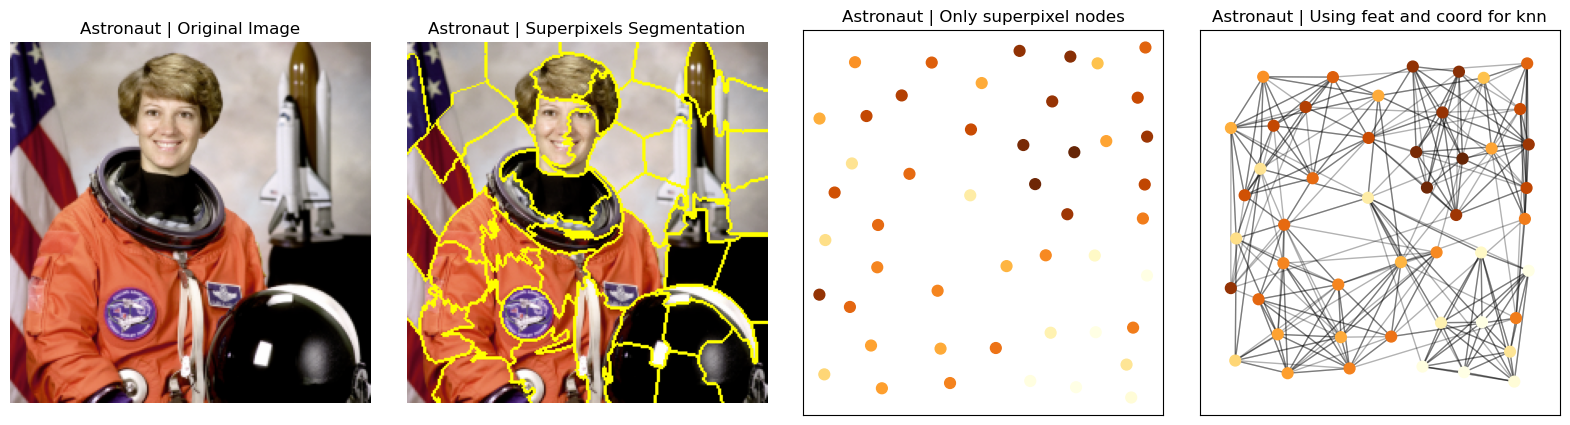

In [3]:
img = data.astronaut()
img = img_as_ubyte(transform.resize(img, (224, 224)))
name = "Astronaut"
f = plt.figure(figsize=(20, 5))

plt1 = f.add_subplot(141)
show_image(plt1, img, name)

plt2 = f.add_subplot(142)
plot_segmentation(plt2, img, name)

plt3 = f.add_subplot(143)  
plot_superpixels_graph(plt3, img, with_edges=False, name=name)

plt4 = f.add_subplot(144)
plot_superpixels_graph(plt4, img, with_edges=True, name=name)


plt.subplots_adjust(hspace=0.1, wspace=0.1)
if not os.path.exists('./demo/superpixels_visualization'):
    os.makedirs('./demo/superpixels_visualization')
f.savefig('./demo/superpixels_visualization/' + 'pipeline.svg')
plt.show()